# Gradient Descent for Machine Learning

----------------------------------------------------------------------

# Optimization for Machine Learning

Optimization is the problem of finding a set of inputs to an objective function that results in a maximum or minimum function evaluation. It is the problem for many machine learning algorithms.

There are multiple popular optimization algorithms, but in general:

- Optimization algorithms can be grouped by whether they utilize the derivative of the function. 
- Classical optimization algorithms use the first and sometimes second derivative of the function. While,
- Black Box optimization algorithms are designed for functions where function derivatives are unavailable or non-differeniable.

## Optimization Algorithms

Optimization algorithms follow a procedure for finding the input parameters or arguments to a function that result in the minimum or maximum output of the function. The most common type of optimization problem in machine learning are involving **continuous functions**, where the input arguments to  the function are real-valued numeric values, e.g. floating point values. The output from the function is also a real-valued evaluation of the input values.

## What is Gradient Descent?

The major feature in optimization algorithms is whether the function can be differentiated. More specifically, whether the first derivative of the function can be calculated for a given data point.

Gradient descent is an optimization algorithm which is mainly used to find the minimum of a function. In machine learning, gradient descent is used to update parameters in a model. This method calculates the derivative of the function where there could be more than one input variable (e.g. multivariate inputs).


## How does Gradient Descent Work?

A gradient simply measures the change in all weights with regard to the change in error. You can also think of a gradient as the slope of a function. The higher the gradient, the steeper the slope and the faster a model can learn. But if the slope is zero, the model stops learning. In mathematical terms, a gradient is a partial derivative with respect to its inputs.

Imagine a blindfolded person who wants to climb to the top of a hill with the fewest steps along the way as possible. They might start climbing the hill by taking really big steps in the steepest direction, which they can do as long as they are not close to the top. As they come closer to the top, however, their steps will get smaller and smaller to avoid overshooting it. This process can describe mathematically using the gradient.

Instead of climbing up a hill, think of gradient descent as a hiking down to the bottom of a valley. This is a better analogy because it is minimization algorithm that minimizes a given function.

<img src="assets/lab_assets/gradient_descent.png" width="450px" height="auto" />


The image below illustrates the hill from a top-view and the red arrows are the steps of our climber. Think of a gradient in this context as a vector that contains the direction of the steepest step the blindfolded man can take and also how long that step should be.

<img src="assets/lab_assets/gradient_descent2.png" width="250px" height="auto" />


Note that the gradient ranging from x0 to x1 is much longer than the one reaching from x3 to x4. This is because the steepness/slope of the hill, which determines the length of the vector, is less. This perfectly represents the example of the hill because the hill is getting less steep the higher it's climb. Therefore a reduced gradient goes along with a reduced slope and a reduced step size for the hill climber.

The equation below describes what gradient descent does: b is the next position of our climber, while a represents his current position. This minus sign refers to the minimization part of gradient descent. The gamma in the middle is a waiting factor and the gradient term ($\Delta f(a)$) is simply the direction of the steepest descent.

$ b = a - \gamma \Delta f(a)$

So this formula tells us the next position we need to go, which is the direction of the steepest descent.

## What is our Learning Rate?

How big the steps are gradient descent takes into the direction of the local minimum are determined by the learning rate, which figures out how fast or slow we will move towards the optimal weights.

For gradient descent to reach the local minimum we must set the learning rate to an appropriate value, which is neither too low nor too high. This is because if the steps it takes are big, it may not reach the local minimum because it bounces back and forth between the convex function of gradient descent (see left image below). If we set the learning rate to a very small value, gradient descent will eventually reach the local minimum but that may take a while (see the right image).

<img src="assets/lab_assets/learning_rate.png" width="450px" height="auto" />

## Challenges in executing Gradient Descent

There are many cases where gradient descent fails to perform well. There are mainly three reasons when this would happen:

1. Data challenges
2. Gradient challenges
3. Implementation challenges

### Data Challenges

- The arrangement of data sometimes leads to challenges. If it is arranged in such a way that it poses a non-converging optimization problem then it becomes difficult to perform optimization using gradient descent. Gradient descent works for problems which are arranged with a well-defined converging optimization problem.
- During the optimization, you will comes across several minimal points. The lowest among all the points is called the global minimum, and other points are called the local minima. We will have to make sure we go the global minimum and avoid local minima.
- There is also a saddle point problem. This is a situation where the gradient is zero but is not an optimal point. It cannot be avoided and is still an active part of the research.

### Gradient Challenges

- While using gradient descent, if the execution is not proper, it leads to certain problems like vanishing gradient. This happens when the gradient is either too small or too large which results in no convergence.

## Variants of Gradient Descent Algorithms

### Simple/Vanilla Gradient Descent

One of the simplest forms of gradient descent technique is the Vanilla Gradient Descent. Here, vanilla means without any adulteration. In this algorithm, the main feature is that small steps are taken in the direction of minima by taking the gradient of function.

The psuedocode for the same is mentioned below

```python
update = learning_rate * gradient_of_parameters
parameters = parameters - update
```

If we see here, the parameters are updated by taking the gradient of the parameters and then the learning rate is multiplied which suggest how quickly we should go towards the minimum. 

Learning rate is a hyper-parameter and while choosing its value we should be careful.

### Gradient Descent with Momentum

One problem with gradient descent is that it has no memory of where the it previously traveled. This can be an issue when there are many shallow minima in the landscape of the solutions. 

In this case, we adjust the algorithm in such a manner that we are aware about the prior step before taking the next step.

The psuedocode for the same is mentioned below:

```python
update = learning_rate * gradient 
velocity = previous_update * momentum
parameter = parameter + velocity - update
```

Here, our update is the same as that of vanilla gradient descent. But we are introducing a new term called velocity, which considers the previous update and a constant which is called momentum.

## Simple Implementation of Gradient Descent in Python

A simple gradient descent algorithm is as follows:

1. Obtain a function in order to minimize f(x)
2. Initialize a value x from which you want to start the descent or optimization from
3. Specify a learning rate which will determine how much of a step to descend by or how quickly you want to converge to the minimum value
4. Find the derivative of that value x (the descent)
5. Now proceed to descend by the derivative of that value and then multiply it by the learning rate
6. Update the value of x with the new value descended to 
7. Check your stop condition in order to see whether to stop
8. If condition satisfies, stop. If not, proceed to step 4 with the new x value and keep repeating the algorithm.

[Source](https://www.knowledgehut.com/blog/data-science/gradient-descent-in-machine-learning)

In [2]:
#imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

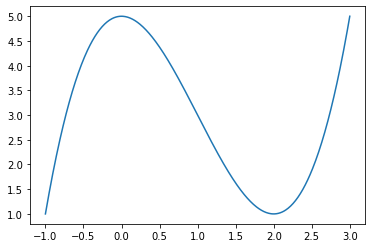

In [3]:
# creating the function and plotting it

func = lambda x: (x ** 3) - (3*(x ** 2)) + 5

# get 1000 evenly spaced numbers between -1 and 3 (arbitrary chosen to ensure steep curve)
x_space = np.linspace(-1,3,500)

# plot the curve 
plt.plot(x_space, func(x_space))
plt.show()

In [4]:
def deriv(value):
    x_deriv = 3*(value**2)-(6*(value))
    return x_deriv

def step(x_new, x_prev, precision, l_r):
    # create empty lists where the updated values of x and y 
    # will be appended during each iteration
    x_list, y_list = [x_new], [func(x_new)]
    # keep looping until your desired precision 
    while abs(x_new - x_prev) > precision:
        # change the value of x
        x_prev = x_new
        # get the derivation of the old value of x
        d_x=-deriv(x_prev)
        # get your new value of x by adding the previous, the multiplication of the derivative and the learning rate 
        x_new = x_prev + (l_r * d_x)
        # append the new value of x to a list of all x-s for later visualization of path
        x_list.append(x_new)
        # append the new value of y to a list of all y-s for later visualization of path
        y_list.append(func(x_new))
    print("Local minimum occurs at:" + str(x_new))
    print("Number of steps:" + str(len(x_list)))

    plt.subplot(1,2,2)
    plt.scatter(x_list,y_list,c="b")
    plt.plot(x_list,y_list,c="b")
    plt.plot(x_space,func(x_space), c="r")
    plt.title("Gradient descent")
    plt.show()

    plt.subplot(1,2,1)
    plt.scatter(x_list,y_list,c="b")
    plt.plot(x_list,y_list,c="b")
    plt.plot(x_space,func(x_space), c="r")
    plt.xlim([1.0,2.1])
    plt.title("Zoomed in Gradient descent to Key Area")
    plt.show()

Local minimum occurs at:1.9980265135950486
Number of steps:25


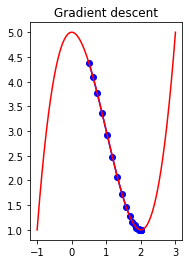

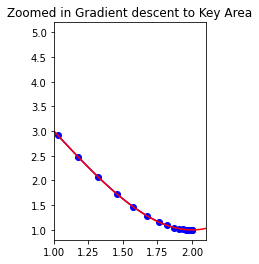

In [5]:
step(0.5, 0, 0.001, 0.05)

## Implementation of Gradient Descent with Momentum

In [6]:
def step_momentum(x_new, x_prev, precision, l_r, p):
    # create empty lists where the updated values of x and y 
    # will be appended during each iteration
    x_list, y_list = [x_new], [func(x_new)]
    # keep looping until your desired precision 
    while abs(x_new - x_prev) > precision:
        # change the value of x
        x_prev = x_new
        # get the derivation of the old value of x
        d_x=-deriv(x_prev)
        # calculating velocity with momentum
        vel = x_prev*p
        # get your new value of x by adding the previous and the velocity, the multiplication of the derivative and the learning rate 
        x_new = x_prev + vel + (l_r * d_x)
        # append the new value of x to a list of all x-s for later visualization of path
        x_list.append(x_new)
        # append the new value of y to a list of all y-s for later visualization of path
        y_list.append(func(x_new))
    print("Local minimum occurs at:" + str(x_new))
    print("Number of steps:" + str(len(x_list)))

    plt.subplot(1,2,2)
    plt.scatter(x_list,y_list,c="b")
    plt.plot(x_list,y_list,c="b")
    plt.plot(x_space,func(x_space), c="r")
    plt.title("Gradient descent")
    plt.show()

    plt.subplot(1,2,1)
    plt.scatter(x_list,y_list,c="b")
    plt.plot(x_list,y_list,c="b")
    plt.plot(x_space,func(x_space), c="r")
    plt.xlim([1.0,2.5])
    plt.title("Zoomed in Gradient descent to Key Area")
    plt.show()

Local minimum occurs at:2.065102108271437
Number of steps:25


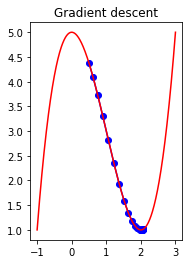

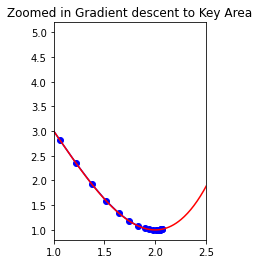

In [7]:
step_momentum(0.5, 0, 0.001, 0.05,0.01)

## Using sympy to auto generate derivative of any function

In [27]:
from sympy import *

x = symbols('x')

# we can define any initial function that we want to find the minimum of
func = lambda x: (x ** 3) - (3*(x)) + 5

x_space = np.linspace(-1,3,500)

# this function we use symp diff method to calculate the derivative without us having to change the derivative each time we change the function
def auto_deriv(value):
    x = symbols('x')
    x_deriv = diff(func(x), x).subs(x, value)
    return x_deriv

In [38]:
def step(x_new, x_prev, precision, l_r):
    # create empty lists where the updated values of x and y 
    # will be appended during each iteration
    x_list, y_list = [x_new], [func(x_new)]
    # keep looping until your desired precision 
    while abs(x_new - x_prev) > precision:
        # change the value of x
        x_prev = x_new
        # get the derivation of the old value of x
        d_x=-auto_deriv(x_prev)
        # get your new value of x by adding the previous, the multiplication of the derivative and the learning rate 
        x_new = x_prev + (l_r * d_x)
        # append the new value of x to a list of all x-s for later visualization of path
        x_list.append(x_new)
        # append the new value of y to a list of all y-s for later visualization of path
        y_list.append(func(x_new))
    print("Local minimum occurs at:" + str(x_new))
    print("Number of steps:" + str(len(x_list)))

    plt.subplot(1,2,2)
    plt.scatter(x_list,y_list,c="b")
    plt.plot(x_list,y_list,c="b")
    plt.plot(x_space,func(x_space), c="r")
    plt.title("Gradient descent")
    plt.show()

    plt.subplot(1,2,1)
    plt.scatter(x_list,y_list,c="b")
    plt.plot(x_list,y_list,c="b")
    plt.plot(x_space,func(x_space), c="r")
    plt.xlim([0.25,1.5])
    plt.title("Zoomed in Gradient descent to Key Area")
    plt.show()

In [39]:
def step_momentum(x_new, x_prev, precision, l_r, p):
    # create empty lists where the updated values of x and y 
    # will be appended during each iteration
    x_list, y_list = [x_new], [func(x_new)]
    # keep looping until your desired precision 
    while abs(x_new - x_prev) > precision:
        # change the value of x
        x_prev = x_new
        # get the derivation of the old value of x
        d_x=-auto_deriv(x_prev)
        # calculating velocity with momentum
        vel = x_prev*p
        # get your new value of x by adding the previous and the velocity, the multiplication of the derivative and the learning rate 
        x_new = x_prev + vel + (l_r * d_x)
        # append the new value of x to a list of all x-s for later visualization of path
        x_list.append(x_new)
        # append the new value of y to a list of all y-s for later visualization of path
        y_list.append(func(x_new))
    print("Local minimum occurs at:" + str(x_new))
    print("Number of steps:" + str(len(x_list)))

    plt.subplot(1,2,2)
    plt.scatter(x_list,y_list,c="b")
    plt.plot(x_list,y_list,c="b")
    plt.plot(x_space,func(x_space), c="r")
    plt.title("Gradient descent")
    plt.show()

    plt.subplot(1,2,1)
    plt.scatter(x_list,y_list,c="b")
    plt.plot(x_list,y_list,c="b")
    plt.plot(x_space,func(x_space), c="r")
    plt.xlim([0.25,1.5])
    plt.title("Zoomed in Gradient descent to Key Area")
    plt.show()

Local minimum occurs at:0.998254287591768
Number of steps:18


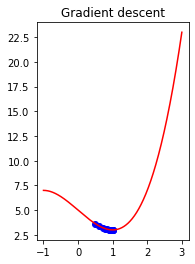

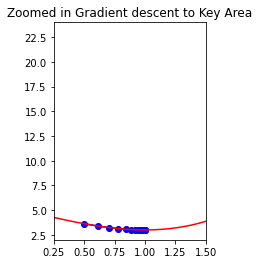

In [40]:
step(0.5, 0, 0.001, 0.05)

Local minimum occurs at:1.17868335801733
Number of steps:19


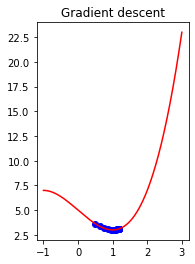

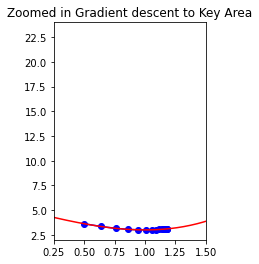

In [42]:
step_momentum(0.5, 0, 0.001, 0.05,0.05)